# 01. BIẾN ĐỔI LOGARIT & CHUẨN HÓA DỮ LIỆU

## Log Transformation & StandardScaler

**Mục đích chính:**
- Giảm độ lệch (skewness) của các biến FDI và Trade_Openness
- Chuẩn hóa Z-score (mean=0, std=1) cho tất cả biến
- Chuẩn bị dữ liệu cho các phân tích nâng cao (PCA, K-Means, ML)

**Công thức:**
- Log Transform: $X_{log} = \log(X + 1)$
- Z-score: $X_{scaled} = \frac{X - \mu}{\sigma}$

**Dữ liệu:** 9 quốc gia ASEAN, 2000-2024 (225 observations)

---

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.precision', 3)
print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 2. Load Data

In [2]:
df = pd.read_csv('../01_Data/02_Processed/ASEAN_FDI_GDP_Data_Final.csv')
print(f"✅ Data loaded: {df.shape[0]} observations, {df.shape[1]} columns")
print(f"Countries: {sorted(df['Country'].unique())}")
df.head()

✅ Data loaded: 225 observations, 8 columns
Countries: ['Brunei Darussalam', 'Cambodia', 'Indonesia', 'Lao PDR', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']


,Country,Country_Code,Year,FDI,GDP_Growth,Exports_pct_GDP,Imports_pct_GDP,Trade_Openness
0,Brunei Darussalam,BRN,2000,5.496e+08,3.475,56.970,30.085,87.055
1,Brunei Darussalam,BRN,2001,6.069e+07,1.466,57.930,33.170,91.100
2,Brunei Darussalam,BRN,2002,2.297e+08,3.961,56.656,36.560,93.216
3,Brunei Darussalam,BRN,2003,1.238e+08,3.583,58.421,30.665,89.086
4,Brunei Darussalam,BRN,2004,1.132e+08,0.105,57.766,27.116,84.882


## 3. LOG TRANSFORMATION

**Xử lý FDI âm (negative FDI - divestment):**
- Một số năm có FDI âm (vốn rút ra)
- Giải pháp: Shift tất cả giá trị FDI lên để dương trước khi log
- Công thức: `FDI_log = log(FDI + |min(FDI)| + 1 + 1)`

In [3]:
# Check skewness before transformation
print("📊 Skewness BEFORE Log Transformation:")
print(f"FDI Skewness: {df['FDI'].skew():.3f}")
print(f"GDP_Growth Skewness: {df['GDP_Growth'].skew():.3f}")
print(f"Trade_Openness Skewness: {df['Trade_Openness'].skew():.3f}")

# Handle negative FDI values by shifting all values to positive
# Method: Add abs(min(FDI)) + 1 to make all values positive before log
fdi_min = df['FDI'].min()
print(f"\n⚠️  FDI min value: {fdi_min:,.0f}")
print(f"Number of negative FDI values: {(df['FDI'] < 0).sum()}")

# Shift FDI to make all positive
fdi_shift = abs(fdi_min) + 1 if fdi_min < 0 else 0
df['FDI_log'] = np.log(df['FDI'] + fdi_shift + 1)
df['Trade_Openness_log'] = np.log(df['Trade_Openness'] + 1)

print(f"\n✅ Applied shift of {fdi_shift:,.0f} to FDI before log transform")
print("\n📊 Skewness AFTER Log Transformation:")
print(f"FDI_log Skewness: {df['FDI_log'].skew():.3f}")
print(f"Trade_Openness_log Skewness: {df['Trade_Openness_log'].skew():.3f}")

📊 Skewness BEFORE Log Transformation:
FDI Skewness: 3.840
GDP_Growth Skewness: -0.989
Trade_Openness Skewness: 1.780

⚠️  FDI min value: -4,550,355,286
Number of negative FDI values: 7

✅ Applied shift of 4,550,355,287 to FDI before log transform

📊 Skewness AFTER Log Transformation:
FDI_log Skewness: -9.616
Trade_Openness_log Skewness: 0.449


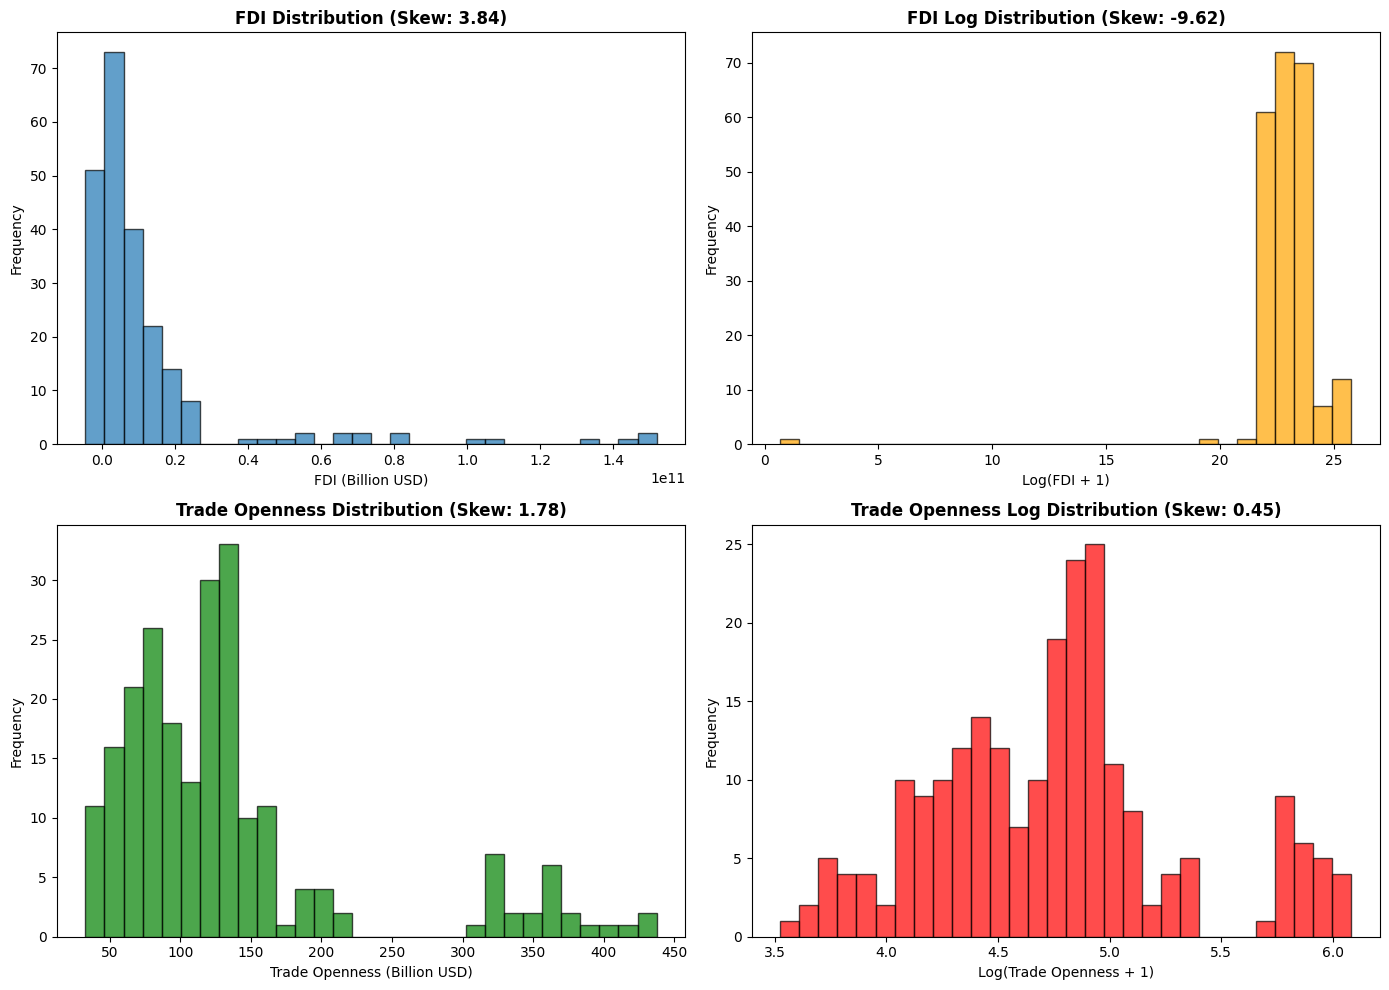


✅ Log transformation completed & saved!


In [4]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(df['FDI'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title(f'FDI Distribution (Skew: {df["FDI"].skew():.2f})', fontweight='bold')
axes[0, 0].set_xlabel('FDI (Billion USD)')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df['FDI_log'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title(f'FDI Log Distribution (Skew: {df["FDI_log"].skew():.2f})', fontweight='bold')
axes[0, 1].set_xlabel('Log(FDI + 1)')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(df['Trade_Openness'], bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_title(f'Trade Openness Distribution (Skew: {df["Trade_Openness"].skew():.2f})', fontweight='bold')
axes[1, 0].set_xlabel('Trade Openness (Billion USD)')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(df['Trade_Openness_log'], bins=30, edgecolor='black', alpha=0.7, color='red')
axes[1, 1].set_title(f'Trade Openness Log Distribution (Skew: {df["Trade_Openness_log"].skew():.2f})', fontweight='bold')
axes[1, 1].set_xlabel('Log(Trade Openness + 1)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../03_Results/01_Log_Transformation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Log transformation completed & saved!")

## 4. STANDARDSCALER (Z-score Normalization)

In [5]:
# Select features for scaling
features_for_scaling = ['FDI_log', 'GDP_Growth', 'Trade_Openness_log']
X_raw = df[features_for_scaling].copy()

print("📊 BEFORE Standardization:")
print(X_raw.describe())

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_scaling, index=X_raw.index)

print("\n📊 AFTER Standardization (Z-score):")
print(X_scaled_df.describe())

📊 BEFORE Standardization:
       FDI_log  GDP_Growth  Trade_Openness_log
count  225.000     225.000             225.000
mean    22.986       4.781               4.745
std      1.724       3.301               0.555
min      0.693      -9.518               3.526
25%     22.396       3.555               4.332
50%     22.912       5.294               4.773
75%     23.565       6.899               4.968
max     25.776      14.520               6.083

📊 AFTER Standardization (Z-score):
         FDI_log  GDP_Growth  Trade_Openness_log
count  2.250e+02   2.250e+02           2.250e+02
mean   1.390e-15   2.763e-17          -8.211e-16
std    1.002e+00   1.002e+00           1.002e+00
min   -1.296e+01  -4.342e+00          -2.203e+00
25%   -3.429e-01  -3.722e-01          -7.456e-01
50%   -4.261e-02   1.557e-01           5.102e-02
75%    3.371e-01   6.431e-01           4.034e-01
max    1.623e+00   2.957e+00           2.418e+00


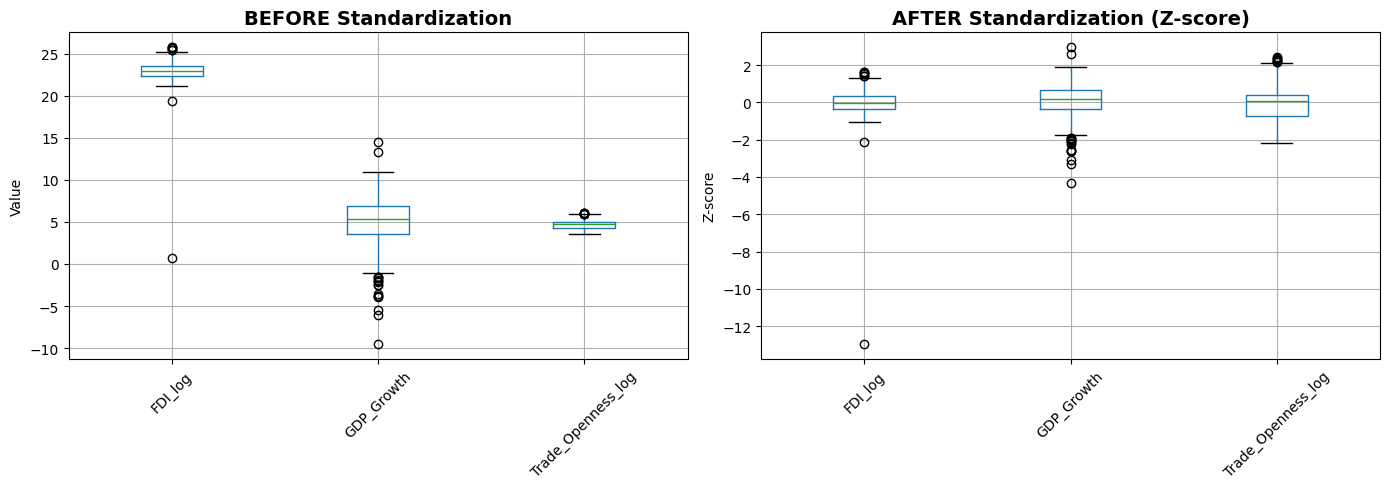


✅ Standardization completed & saved!


In [6]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

X_raw.boxplot(ax=axes[0])
axes[0].set_title('BEFORE Standardization', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Value')
axes[0].tick_params(axis='x', rotation=45)

X_scaled_df.boxplot(ax=axes[1])
axes[1].set_title('AFTER Standardization (Z-score)', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Z-score')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../03_Results/02_StandardScaler.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Standardization completed & saved!")

## 5. Save Processed Data

In [7]:
# Add scaled columns to original dataframe
df['FDI_log_scaled'] = X_scaled_df['FDI_log']
df['GDP_Growth_scaled'] = X_scaled_df['GDP_Growth']
df['Trade_Openness_log_scaled'] = X_scaled_df['Trade_Openness_log']

# Save
df.to_csv('../01_Data/02_Processed/ASEAN_Transformed_Data.csv', index=False)
print("✅ Transformed data saved to: '../01_Data/02_Processed/ASEAN_Transformed_Data.csv'")
print(f"\nFinal shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

✅ Transformed data saved to: '../01_Data/02_Processed/ASEAN_Transformed_Data.csv'

Final shape: (225, 13)
Columns: ['Country', 'Country_Code', 'Year', 'FDI', 'GDP_Growth', 'Exports_pct_GDP', 'Imports_pct_GDP', 'Trade_Openness', 'FDI_log', 'Trade_Openness_log', 'FDI_log_scaled', 'GDP_Growth_scaled', 'Trade_Openness_log_scaled']
